In [19]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [24]:
from scipy.interpolate import RegularGridInterpolator

In [25]:
def inter(size_old, size_new, data_64x64):

  x_64 = np.linspace(0, 1, size_old)
  y_64 = np.linspace(0, 1, size_old)


  interpolator = RegularGridInterpolator((x_64, y_64), data_64x64, method='nearest', bounds_error=False, fill_value=None)

  x_256 = np.linspace(0, 1, size_new)
  y_256 = np.linspace(0, 1, size_new)

  
  x_new, y_new = np.meshgrid(x_256, y_256)

  points = np.column_stack((x_new.ravel(), y_new.ravel()))

 
  data_256x256 = interpolator(points).reshape(size_new, size_new)
  return data_256x256

def grid_for_draw(points):
  element_length = points / (points - 1)
  x = np.linspace(0.0, DOMAIN_SIZE, points)
  y = np.linspace(0.0, DOMAIN_SIZE, points)
  X, Y = np.meshgrid(x, y)
  return X, Y

In [26]:
p_big_i = inter(64, 128, p_min)
u_big_i = inter(64, 128, u_min)
v_big_i = inter(64, 128, v_min)

In [27]:
import matplotlib.pyplot as plt
def draw(p_big_i, p_big, p_min):
  X, Y = grid_for_draw(128)
  plt.style.use("dark_background")
  fig = plt.figure()
  ax = fig.add_subplot(1, 3, 1)
  ax.contourf(X[::2, ::2], Y[::2, ::2], p_big_i[::2, ::2], cmap="coolwarm")
  ax.set_title("Interpolation", fontsize=20)
  #fig.colorbar()
  ax2 = fig.add_subplot(1, 3, 2)
  ax2.contourf(X[::2, ::2], Y[::2, ::2], p_big[::2, ::2], cmap="coolwarm")
  ax2.set_title("Precise one", fontsize=20)
  #ax2.colorbar()

  X, Y = grid_for_draw(64)

  ax3 = fig.add_subplot(1, 3, 3)
  ax3.contourf(X[::2, ::2], Y[::2, ::2], p_min[::2, ::2], cmap="coolwarm")
  ax3.set_title("Crude", fontsize=20)
  #ax3.colorbar()
  plt.show()

def draw_velocities(v_big_i, v_big, v_min, u_big_i, u_big, u_min):
  X, Y = grid_for_draw(128)
  plt.style.use("dark_background")
  fig = plt.figure(figsize=(5, 5))
  ax = fig.add_subplot(1, 2, 1)
  ax.contourf(X[::2, ::2], Y[::2, ::2], u_big_i[::2, ::2], cmap="coolwarm")
  ax.quiver(X[::2, ::2], Y[::2, ::2], u_big_i[::2, ::2], v_big_i[::2, ::2], color="black")
  ax.set_title("Interpolation", fontsize=20)
  #fig.colorbar()
  ax2 = fig.add_subplot(1, 2, 2)
  ax2.contourf(X[::2, ::2], Y[::2, ::2], u_big[::2, ::2], cmap="coolwarm")
  ax2.quiver(X[::2, ::2], Y[::2, ::2], u_big[::2, ::2], v_big[::2, ::2], color="black")
  ax2.set_title("Precise one", fontsize=20)
  #ax2.colorbar()

  X, Y = grid_for_draw(64)

  #ax3 = fig.add_subplot(1, 3, 3)
  #ax3.contourf(X[::2, ::2], Y[::2, ::2], u_min[::2, ::2], cmap="coolwarm")
  #ax2.quiver(X[::2, ::2], Y[::2, ::2], u_min[::2, ::2], v_min[::2, ::2], color="black")
  #ax3.set_title("Crude", fontsize=20)
  #ax3.colorbar()
  plt.show()

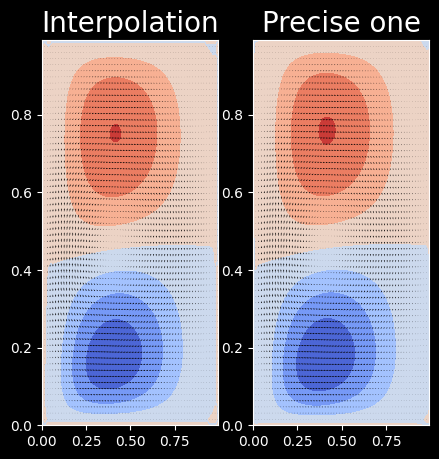

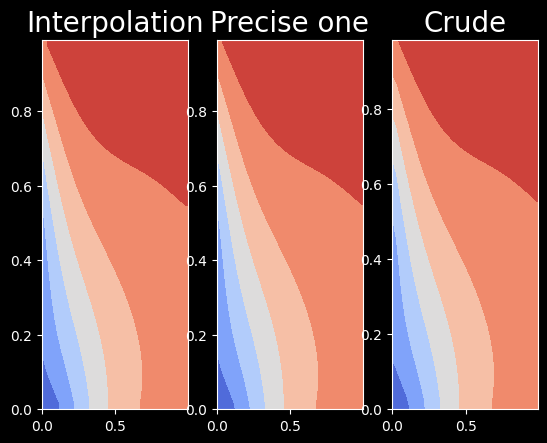

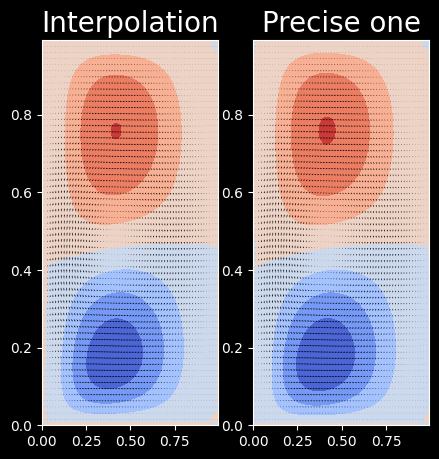

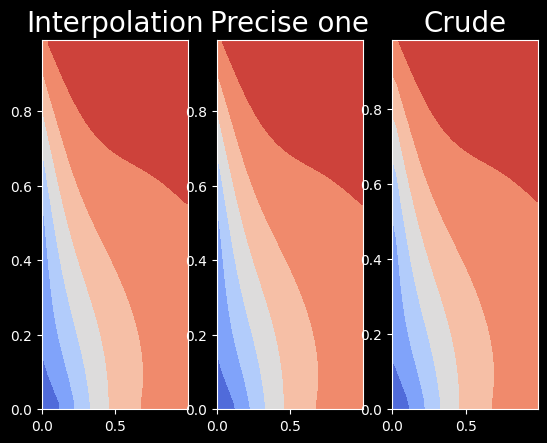

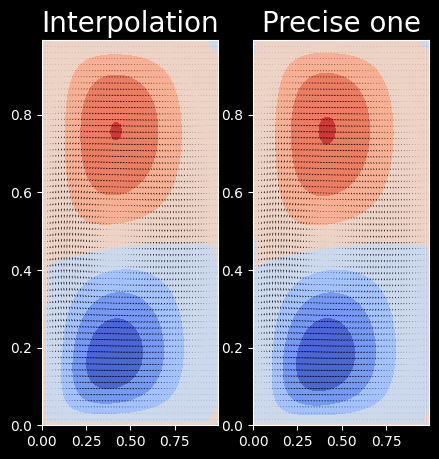

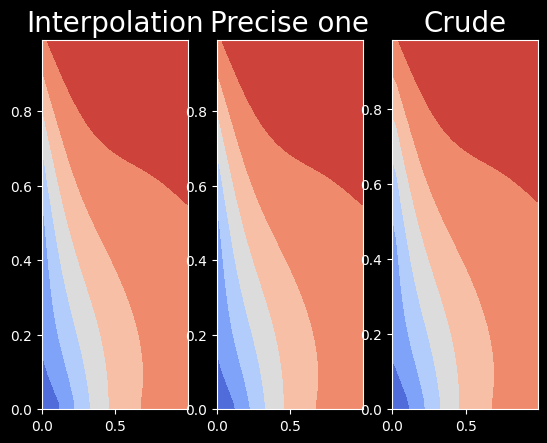

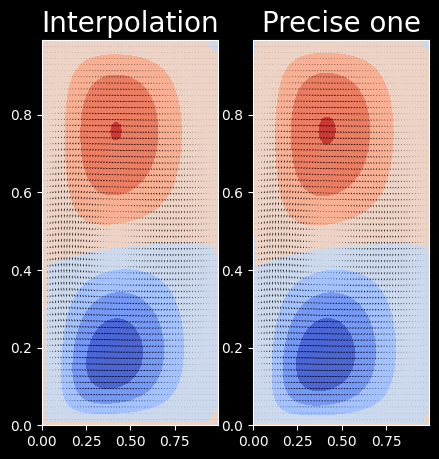

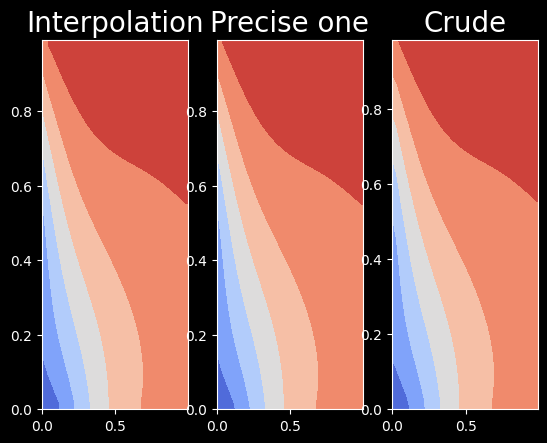

In [28]:

method = ['nearest', 'linear', 'cubic','pchip']
for m in range(4):
  p_big_i = inter_cycle(64, 128, p_min, method[m])
  u_big_i = inter_cycle(64, 128, u_min, method[m])
  v_big_i = inter_cycle(64, 128, v_min, method[m])

  draw_velocities(np.transpose(v_big_i), v_big, v_min, np.transpose(u_big_i), u_big, u_min)

  draw(np.transpose(p_big_i), p_big, p_min)

In [29]:
def inter_cycle(size_old, size_new, data_64x64,met):

  x_64 = np.linspace(0, 1, size_old)
  y_64 = np.linspace(0, 1, size_old)


  interpolator = RegularGridInterpolator((x_64, y_64), data_64x64, method=met, bounds_error=False, fill_value=None)

  x_256 = np.linspace(0, 1, size_new)
  y_256 = np.linspace(0, 1, size_new)


  x_new, y_new = np.meshgrid(x_256, y_256)

  points = np.column_stack((x_new.ravel(), y_new.ravel()))

  data_256x256 = interpolator(points).reshape(size_new, size_new)
  return data_256x256

In [30]:
error_p_list_128 = [[] for _ in range(4)]
error_v_list_128 = [[] for _ in range(4)]
error_u_list_128 = [[] for _ in range(4)]
method = ['nearest', 'linear', 'cubic', 'pchip']
for m in range(4):
  p_big_i = inter_cycle(64, 128, p_min, method[m])
  u_big_i = inter_cycle(64, 128, u_min, method[m])
  v_big_i = inter_cycle(64, 128, v_min, method[m])

  relative_matrix_norm_p_128 = np.linalg.norm(np.transpose(p_big_i) - p_big, ord=2) / np.linalg.norm(p_big, ord=2)
  relative_matrix_norm_v_128 = np.linalg.norm(np.transpose(v_big_i) - v_big, ord=2) / np.linalg.norm(v_big, ord=2)
  relative_matrix_norm_u_128 = np.linalg.norm(np.transpose(u_big_i) - u_big, ord=2) / np.linalg.norm(u_big, ord=2)

  error_p_list_128[m].append(relative_matrix_norm_p_128)
  error_v_list_128[m].append(relative_matrix_norm_v_128)
  error_u_list_128[m].append(relative_matrix_norm_u_128)

In [31]:
print("Errors for nearest method:", np.mean(error_p_list_128[0]), np.mean(error_v_list_128[0]),  np.mean(error_u_list_128[0]))
print("Errors for linear method:", np.mean(error_p_list_128[1]), np.mean(error_v_list_128[1]), np.mean(error_u_list_128[1]))
print("Errors for cubic method:", np.mean(error_p_list_128[2]), np.mean(error_v_list_128[2]), np.mean(error_u_list_128[2]))
print("Errors for pchip method:", np.mean(error_p_list_128[3]), np.mean(error_v_list_128[3]), np.mean(error_u_list_128[3]))
     

Errors for nearest method: 0.026955379982775484 0.0733227509205078 0.06090668501182263
Errors for linear method: 0.011636263433195059 0.03899641247274034 0.03219648129862504
Errors for cubic method: 0.010426958724782784 0.03700348219035827 0.030827374706369502
Errors for pchip method: 0.012260913486019737 0.03700705800010953 0.030829165875414313


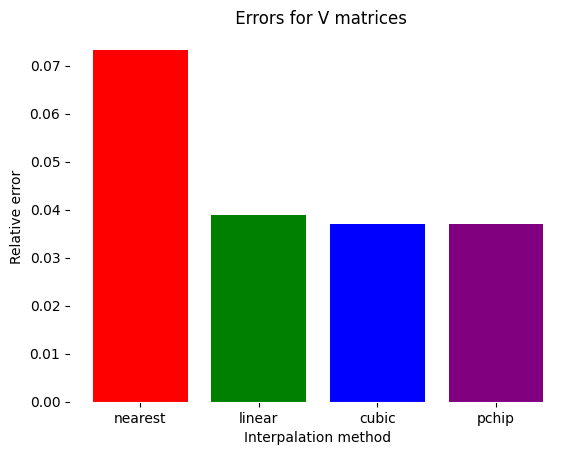

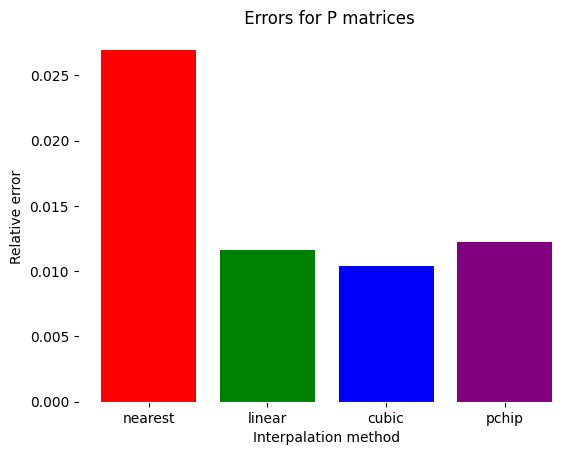

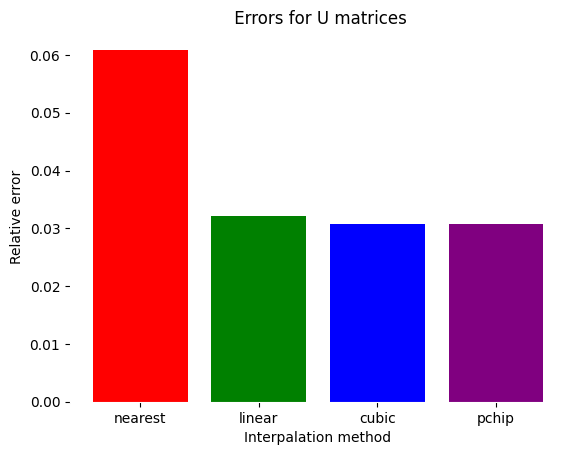

In [32]:
import matplotlib.pyplot as plt



method = ['nearest', 'linear', 'cubic', 'pchip']


method = ['nearest', 'linear', 'cubic', 'pchip']


background_color = 'lightgray'

def plot_histogram(errors, method_name):
    fig, ax = plt.subplots()
    ax.bar(method, errors, color=['red', 'green', 'blue', 'purple'])
    ax.set_xlabel('Interpalation method')
    ax.set_ylabel('Relative error')

    
    title = ax.set_title(f' Errors for {method_name} matrices')
    title.set_color('black')

    
    fig.set_facecolor('white')
    ax.set_facecolor('white')

    
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

    plt.show()

plot_histogram([np.mean(error_v_list_128[0]), np.mean(error_v_list_128[1]), np.mean(error_v_list_128[2]),np.mean(error_v_list_128[3])], 'V')
plot_histogram([np.mean(error_p_list_128[0]), np.mean(error_p_list_128[1]), np.mean(error_p_list_128[2]),np.mean(error_p_list_128[3])], 'P')
plot_histogram([np.mean(error_u_list_128[0]), np.mean(error_u_list_128[1]), np.mean(error_u_list_128[2]),np.mean(error_u_list_128[3])], 'U')